In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

# Main Comments:
It is possible to find intervals where the derivatives converge for all powers of n. However, at higher powers (4 and 6), on the convergence intervals the derivatives are not as invariant as we would want them to be (the derivatives grows by small amount in the n = 4 case, and it oscillates for the n = 6 case). 

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.cmb_lensing
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt
default_color_list = ['#1A1A1A', '#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9']

In [3]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_dmeff', 'h',  'A_s', 'n_s', 'tau_reio', 'sigma_dmeff'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06, 0.0])
nparams = len(pars)

# generate a template CLASS python wrapper configuration
classy_template = {  'output': 'tCl,pCl,lCl,mPk',
                'l_max_scalars': 5000,
                'lensing': 'yes',
                'omega_cdm':1e-22,
                   
                'm_dmeff':1,
                'npow_dmeff' : 0,
                   
                'tight_coupling_trigger_tau_c_over_tau_k':0.,
                'tight_coupling_trigger_tau_c_over_tau_h':0.,
                'reionization_optical_depth_tol': 1e-07,
                'tol_background_integration': 1e-8,
                'tol_perturb_integration': 1e-8,
                'tol_thermo_integration': 1e-9,
                'perturb_sampling_stepsize':0.01,
                'k_max_tau0_over_l_max' : 6,
                'P_k_max_h/Mpc' : 5.,
                'gauge' : 'synchronous',
                'k_per_decade_for_pk' : 100 }

left_steps = np.array([0.0008, 0.003,   0.02,   0.1e-9, 0.01, 0.02, 0.0])
right_steps = np.array([0.0008, 0.003,   0.02,   0.1e-9, 0.01, 0.02, 1e-29])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-left_steps,
                  right=centers+right_steps)

# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

In [4]:
# generate the fiducial cosmology
obs.compute_cosmo(key='fiducial',
                  classy_dict=classy_template)

## 1 GeV, n=0
The derivative converges on the interval [4e-29, 4e-28].

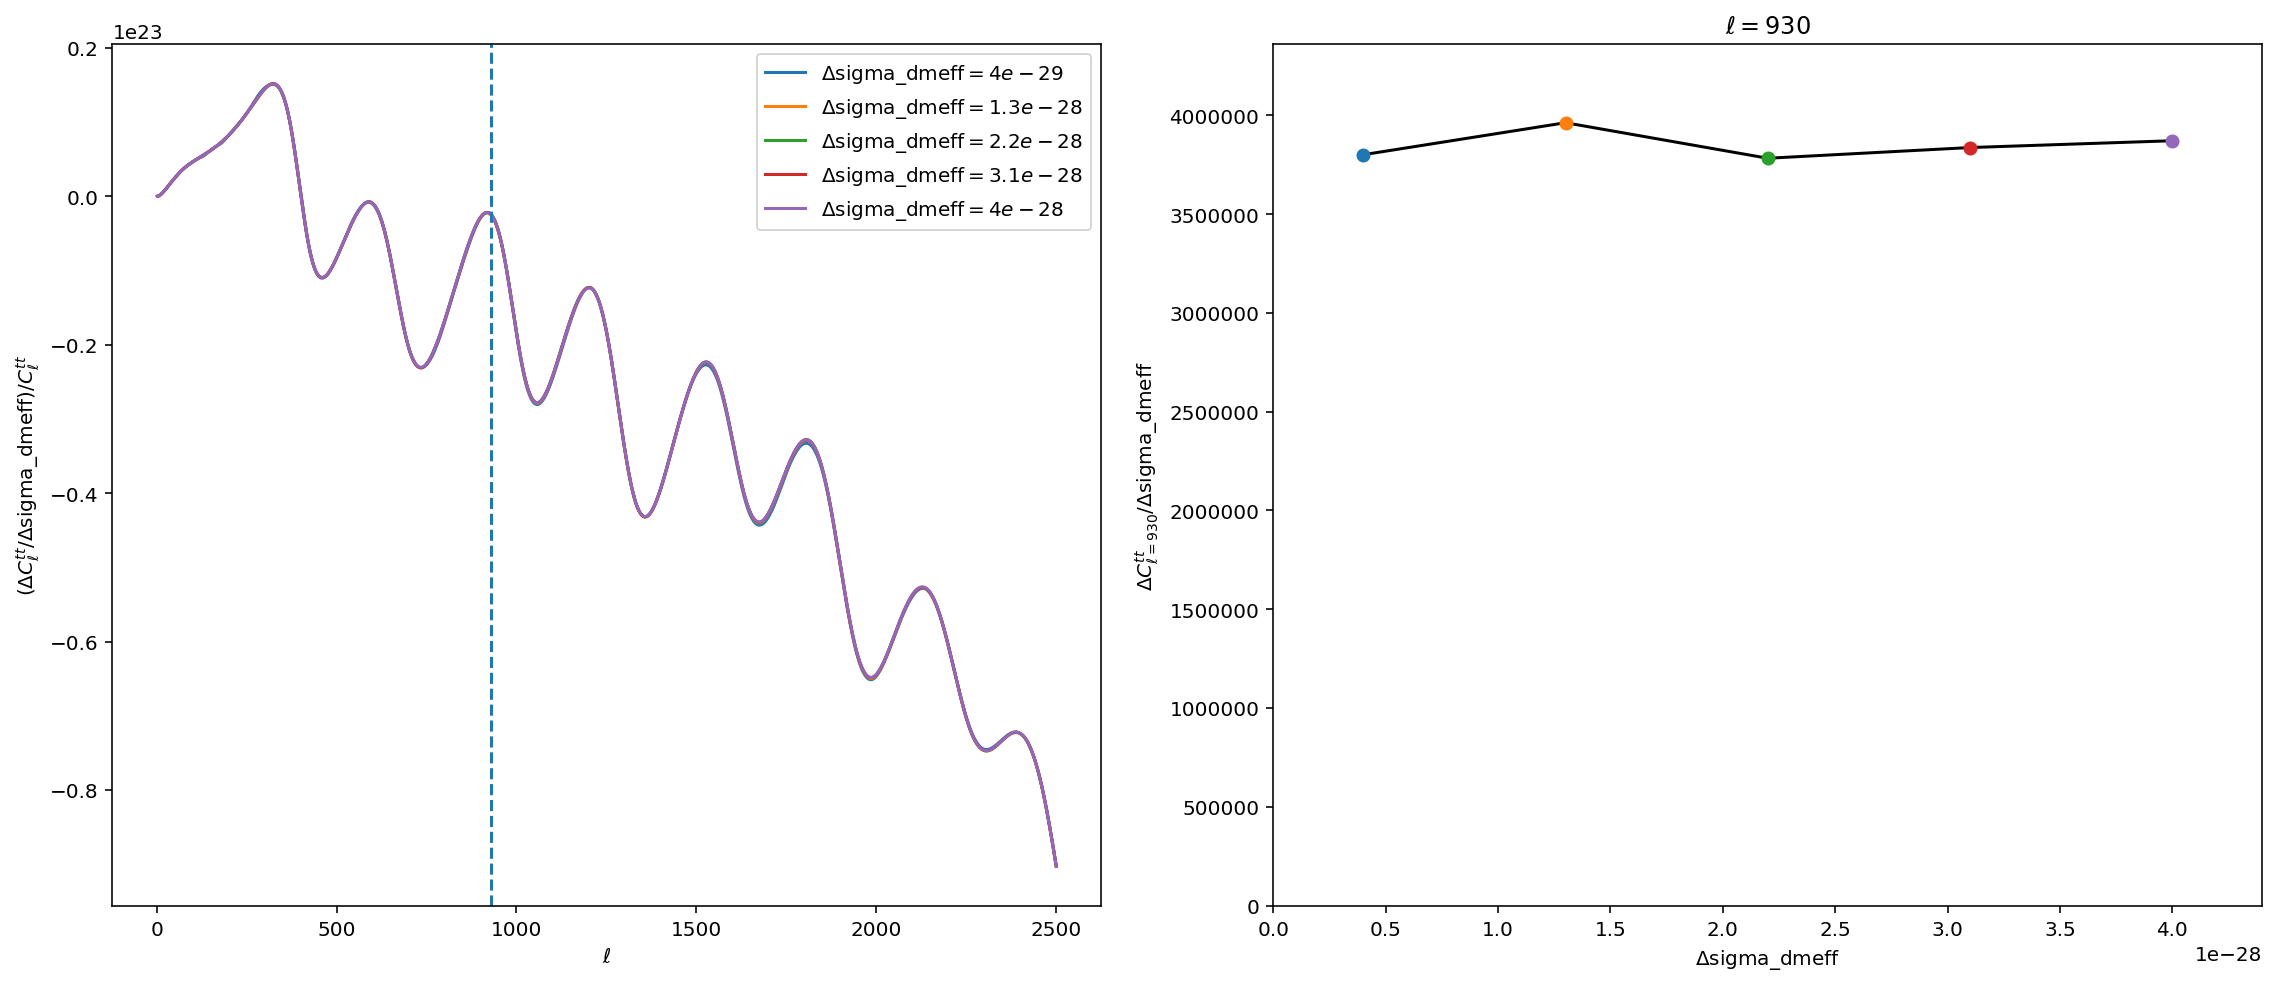

In [23]:
classy_template['m_dmeff'] = 1
classy_template['npow_dmeff'] = 0
# constraint in paper 0.6e-26
# step size in my JP 1.6e-26
obs.check_deriv_compute("sigma_dmeff", np.linspace(4e-29, 4e-28, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

## 1 GeV, n=2

The derivative converges on the interval [1e-20, 1e-19].

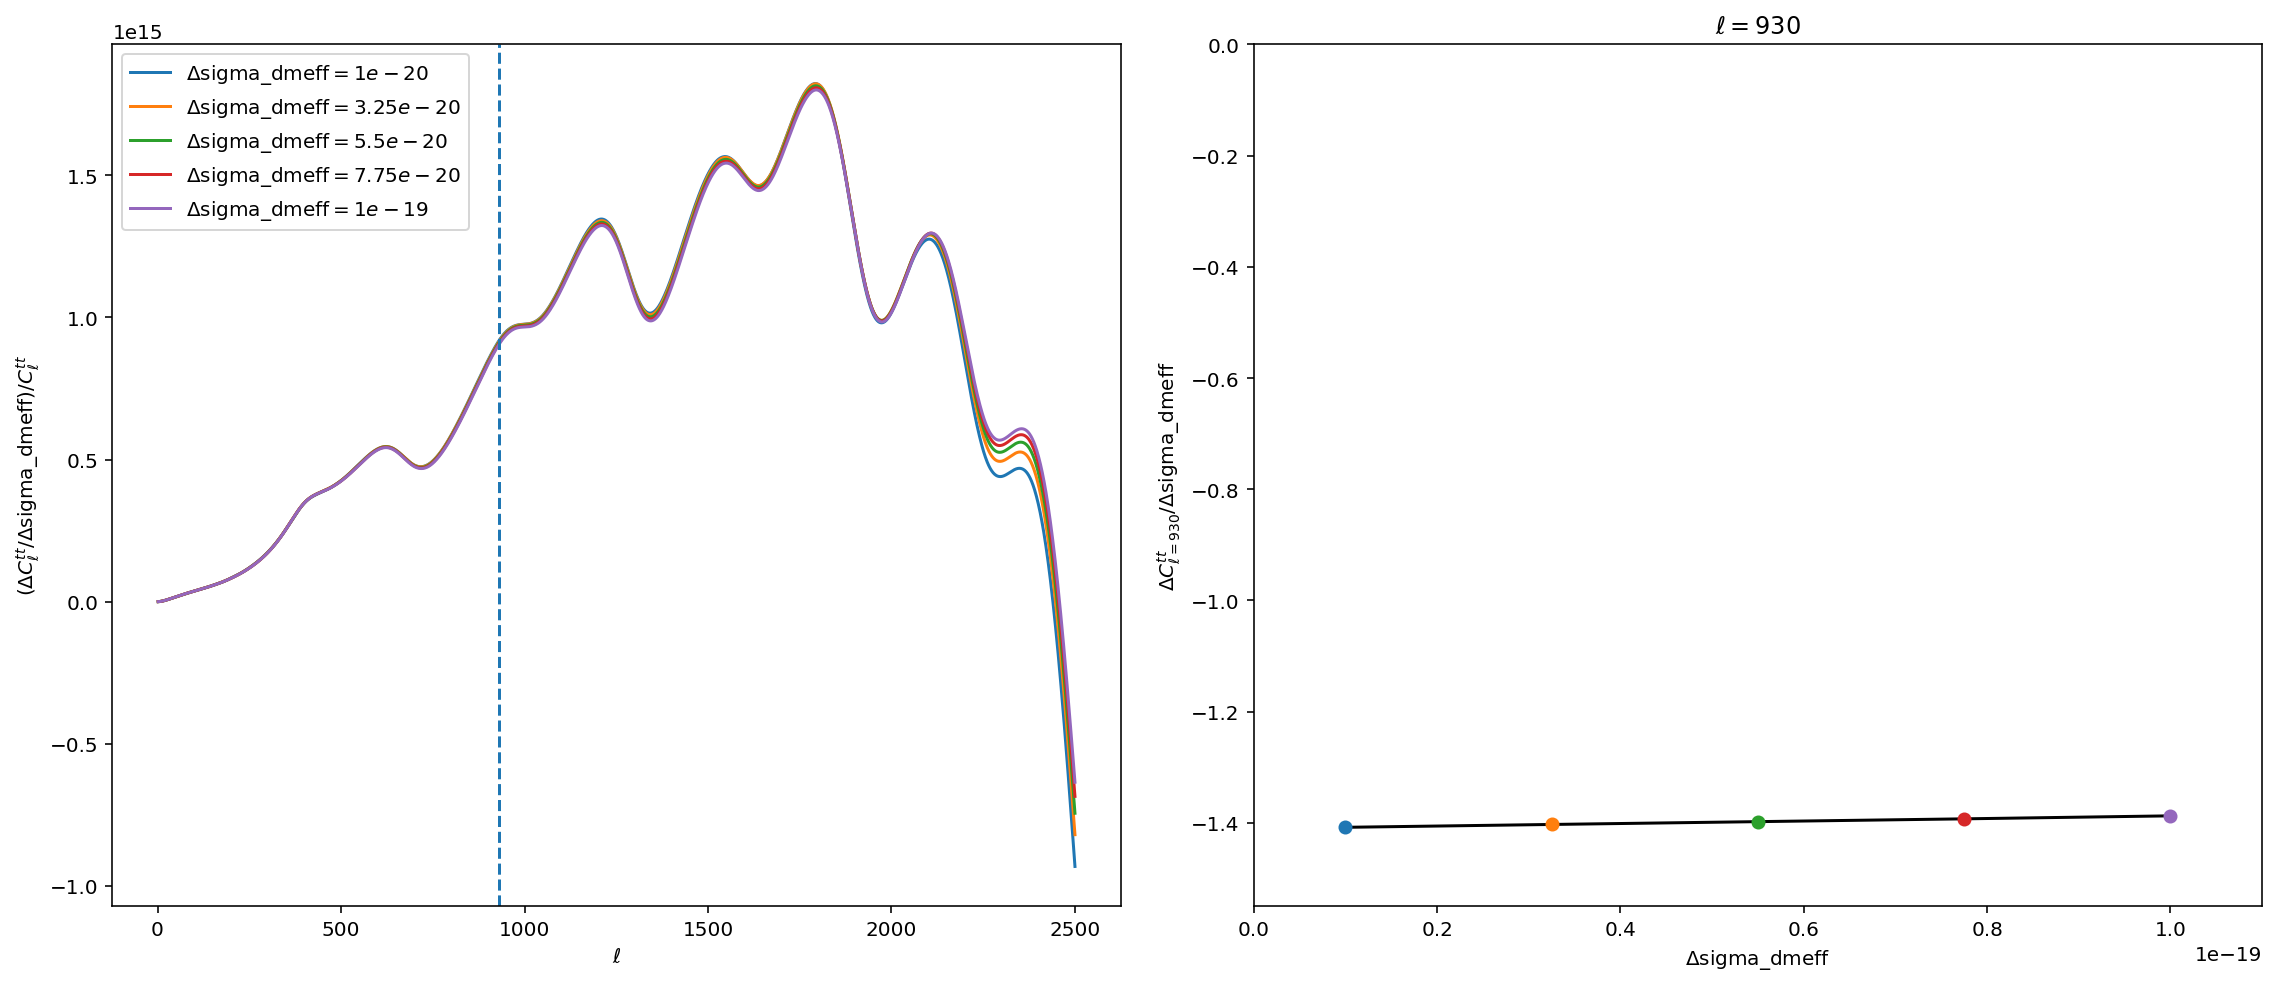

In [16]:
classy_template['m_dmeff'] = 1
classy_template['npow_dmeff'] = 2
# constraint in paper 5.3e-18
# step size in my JP 1.97e-19
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-20, 1e-19, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

## 1 GeV, n=4

The derivative does not seem to converge well on the two following intervals [1e-13, 1e-11]. It seems to converge better on the interval [1e-13, 1e-14].

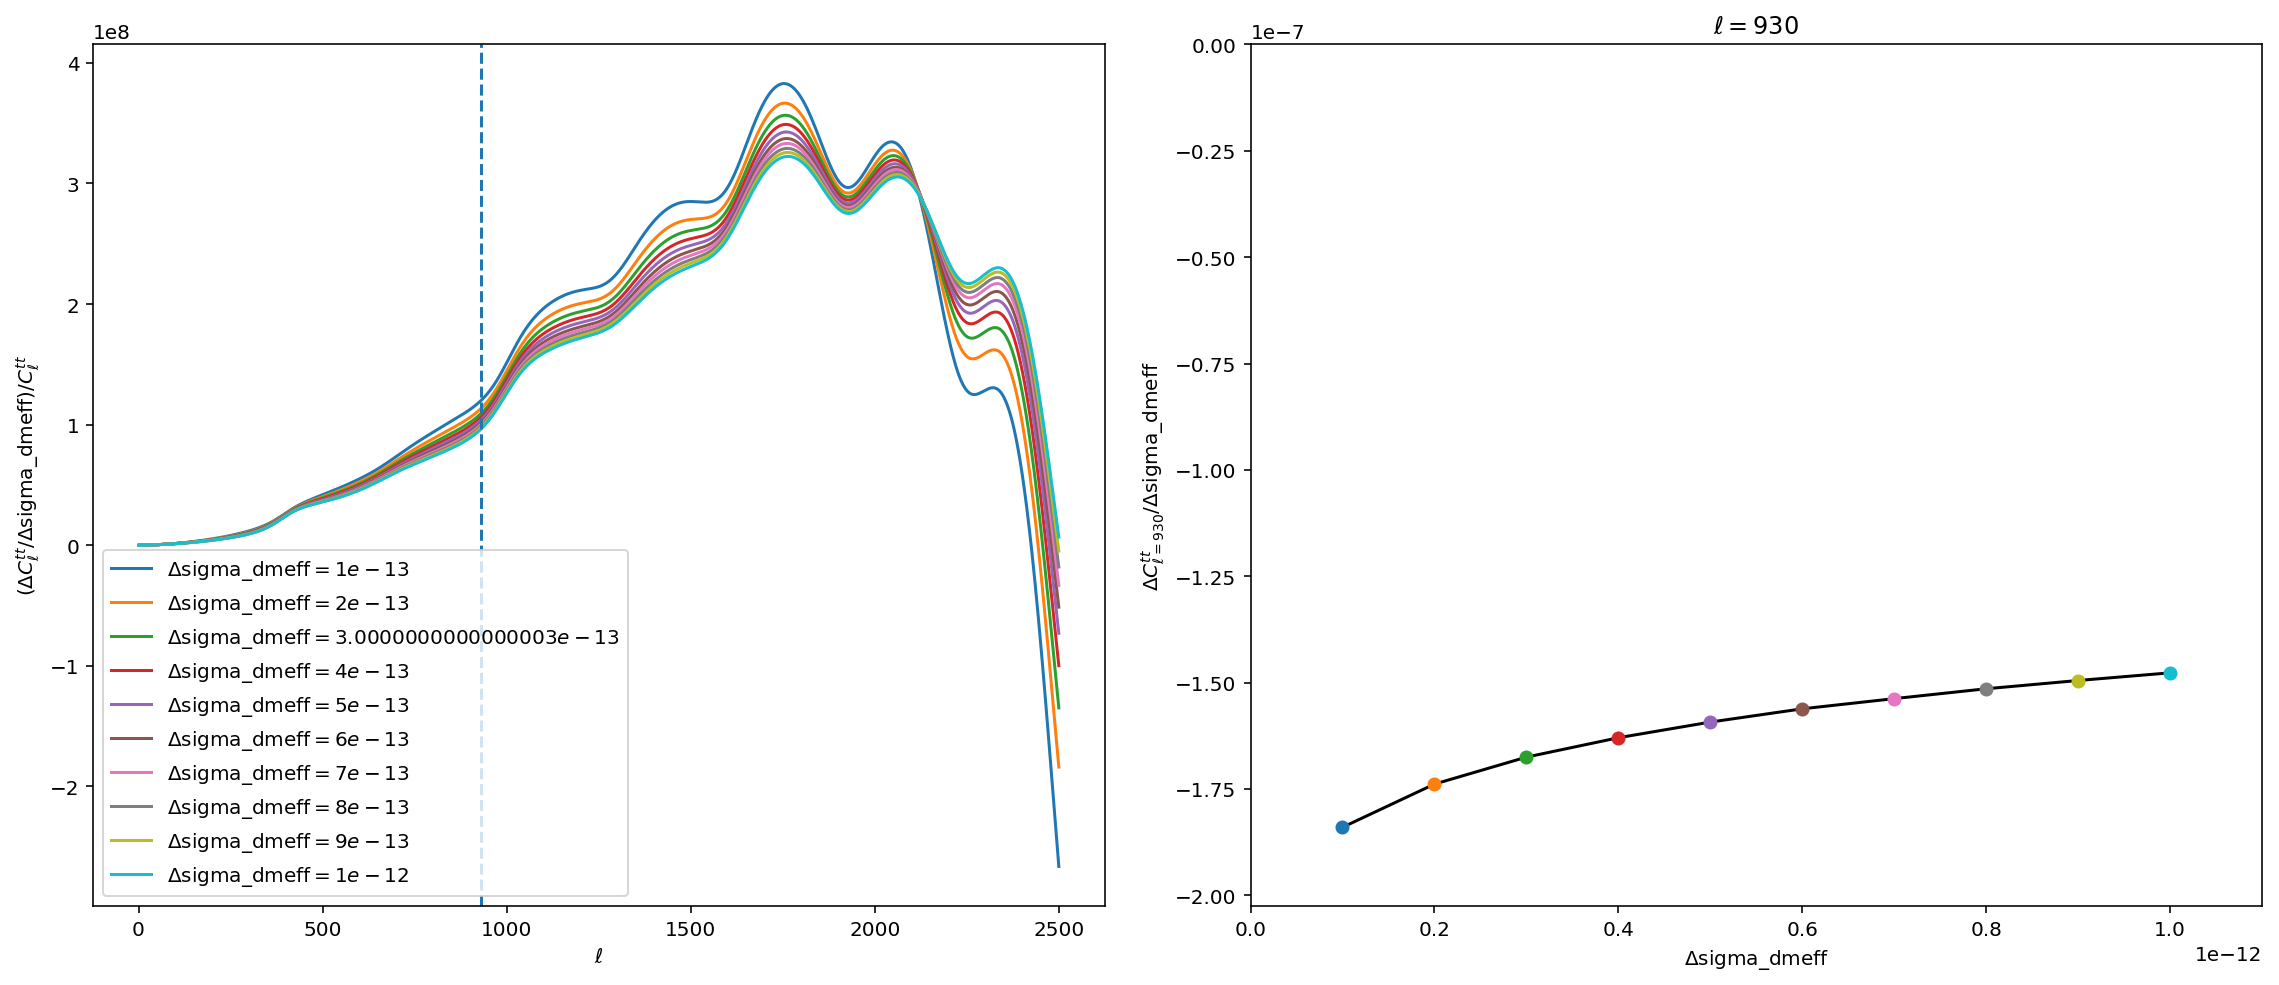

In [22]:
classy_template['m_dmeff'] = 1
classy_template['npow_dmeff'] = 4
# change the size 
# in paper 4.1e-11
# in my JP 2.8e-13
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-13, 1e-12, 10), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

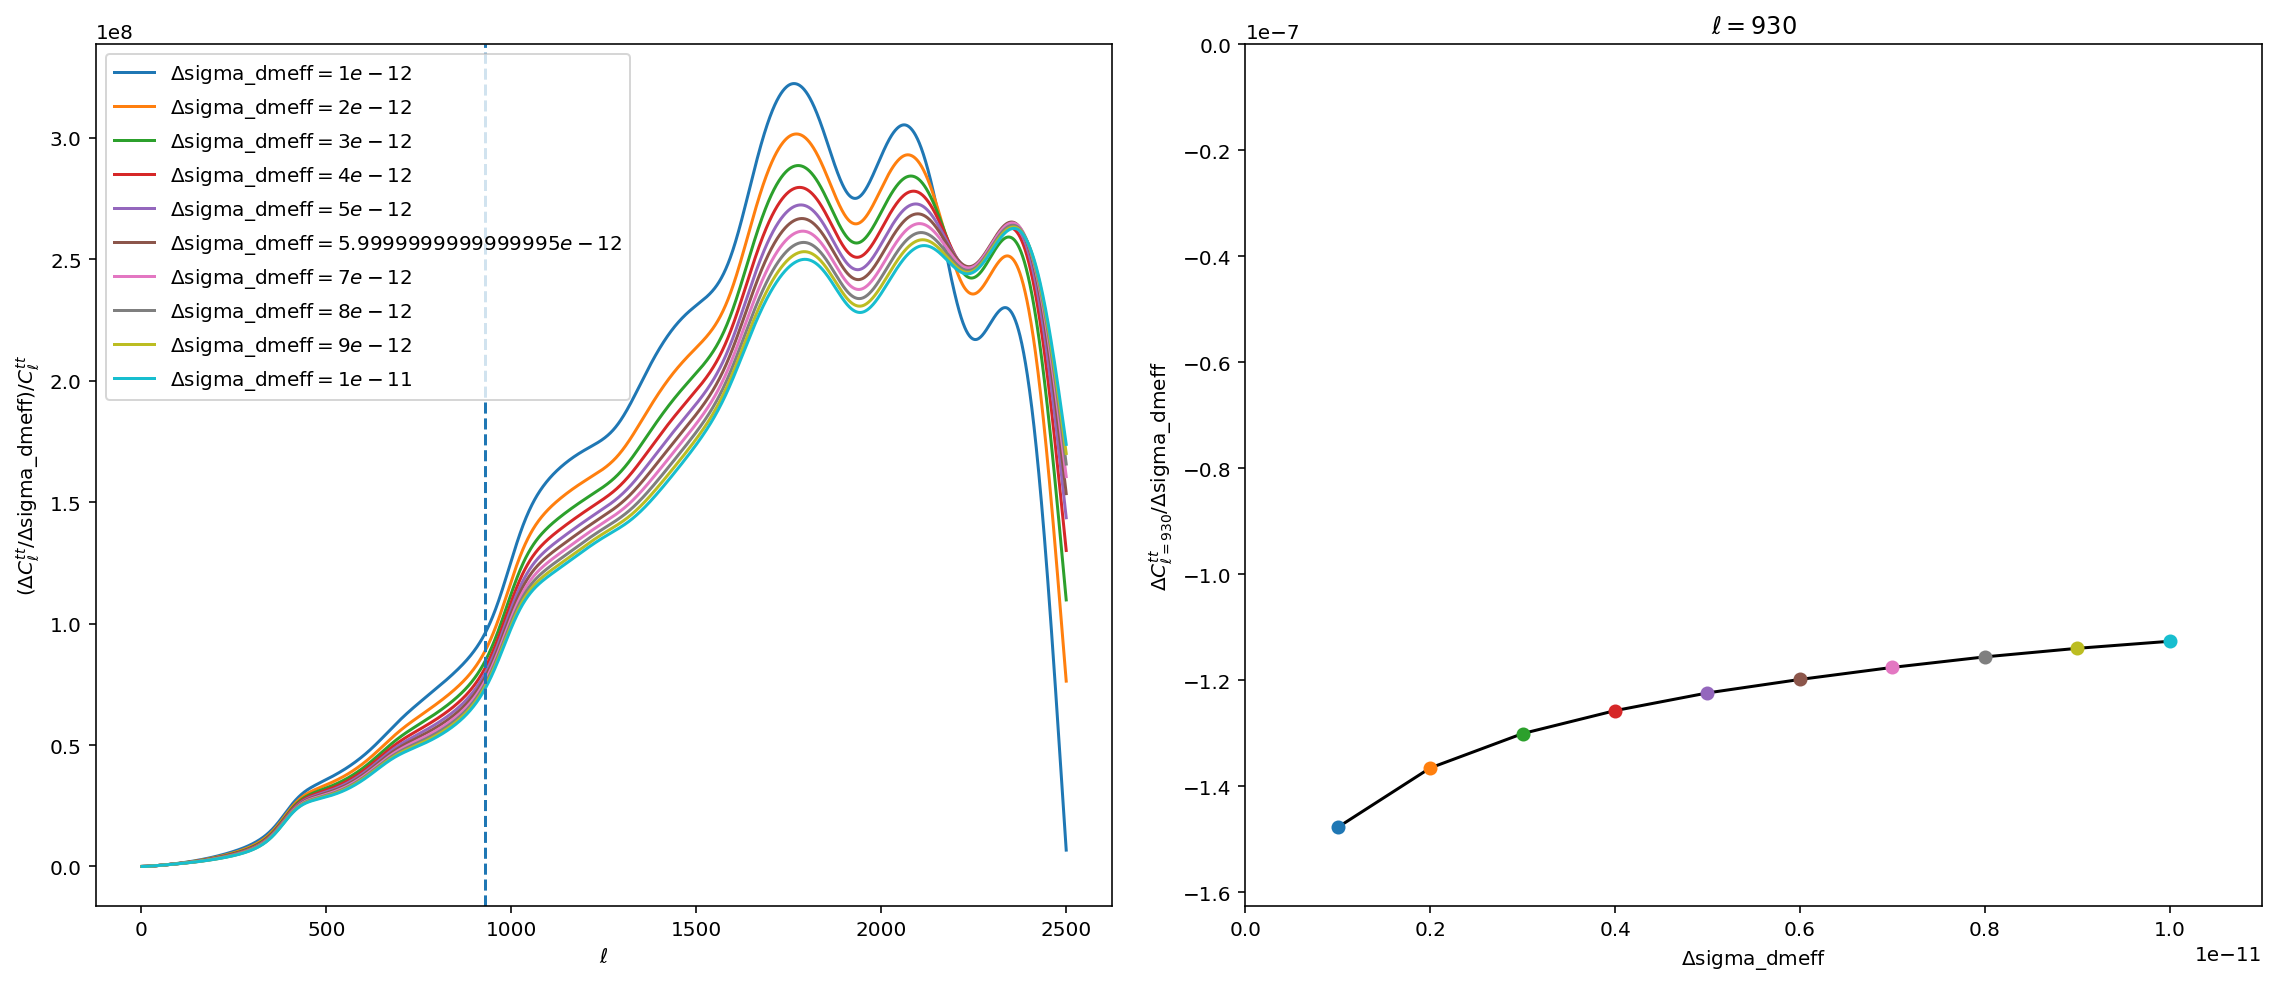

In [8]:
classy_template['m_dmeff'] = 1
classy_template['npow_dmeff'] = 4
# change the size 
# in paper 4.1e-11
# in my JP 2.8e-13
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-12, 1e-11, 10), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

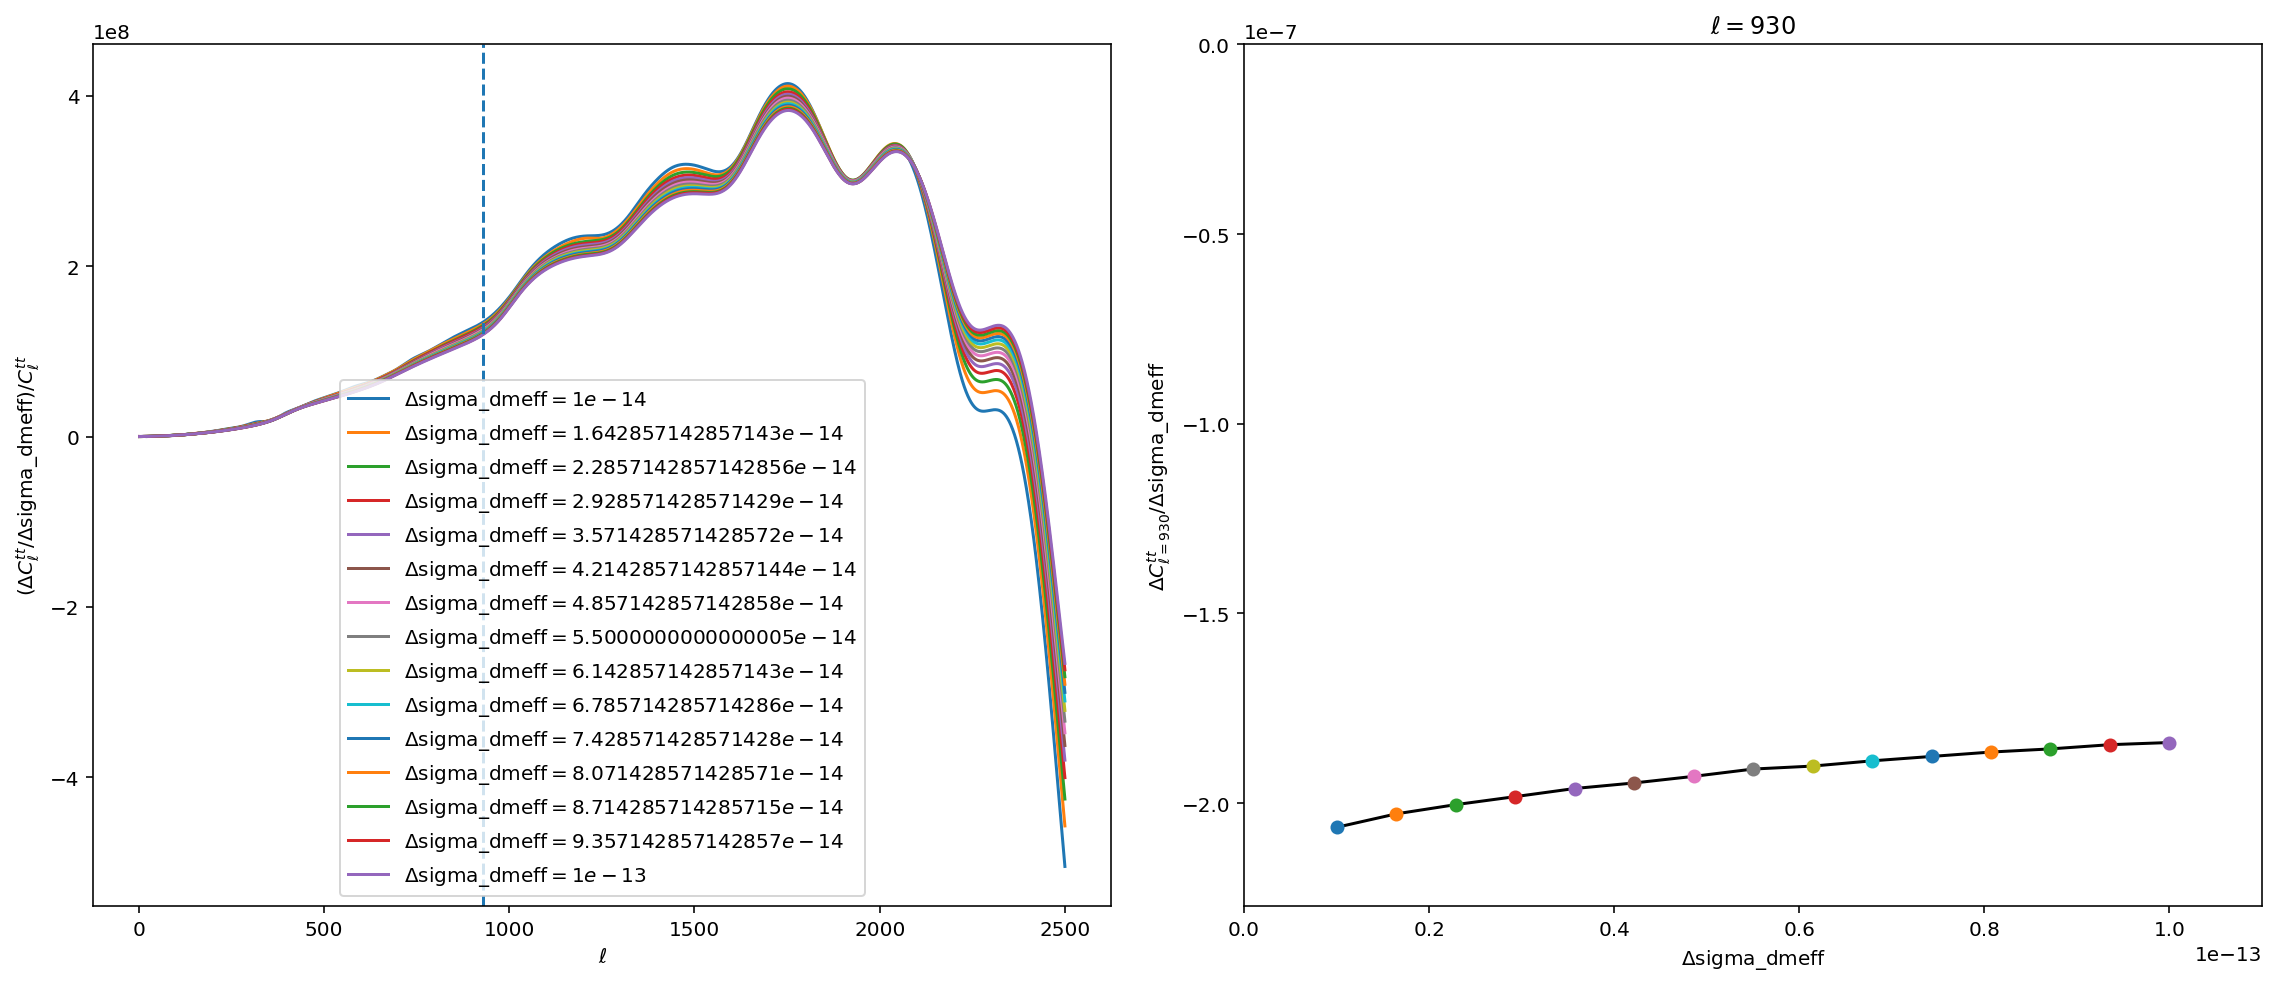

In [9]:
#! probably the best interval
classy_template['m_dmeff'] = 1
classy_template['npow_dmeff'] = 4
# change the size 
# in paper 4.1e-11
# in my JP 2.8e-13
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-14, 1e-13, 15), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

## 1 GeV, n=6
The best interval of convergence is $\sim$ [6e-10, 6e-9] (third plot), although there the derivative still oscillates. On the larger intervals derivative does not converge well, and on the smaller interval (last picture) it seems like the derivative hits the numerical noise.

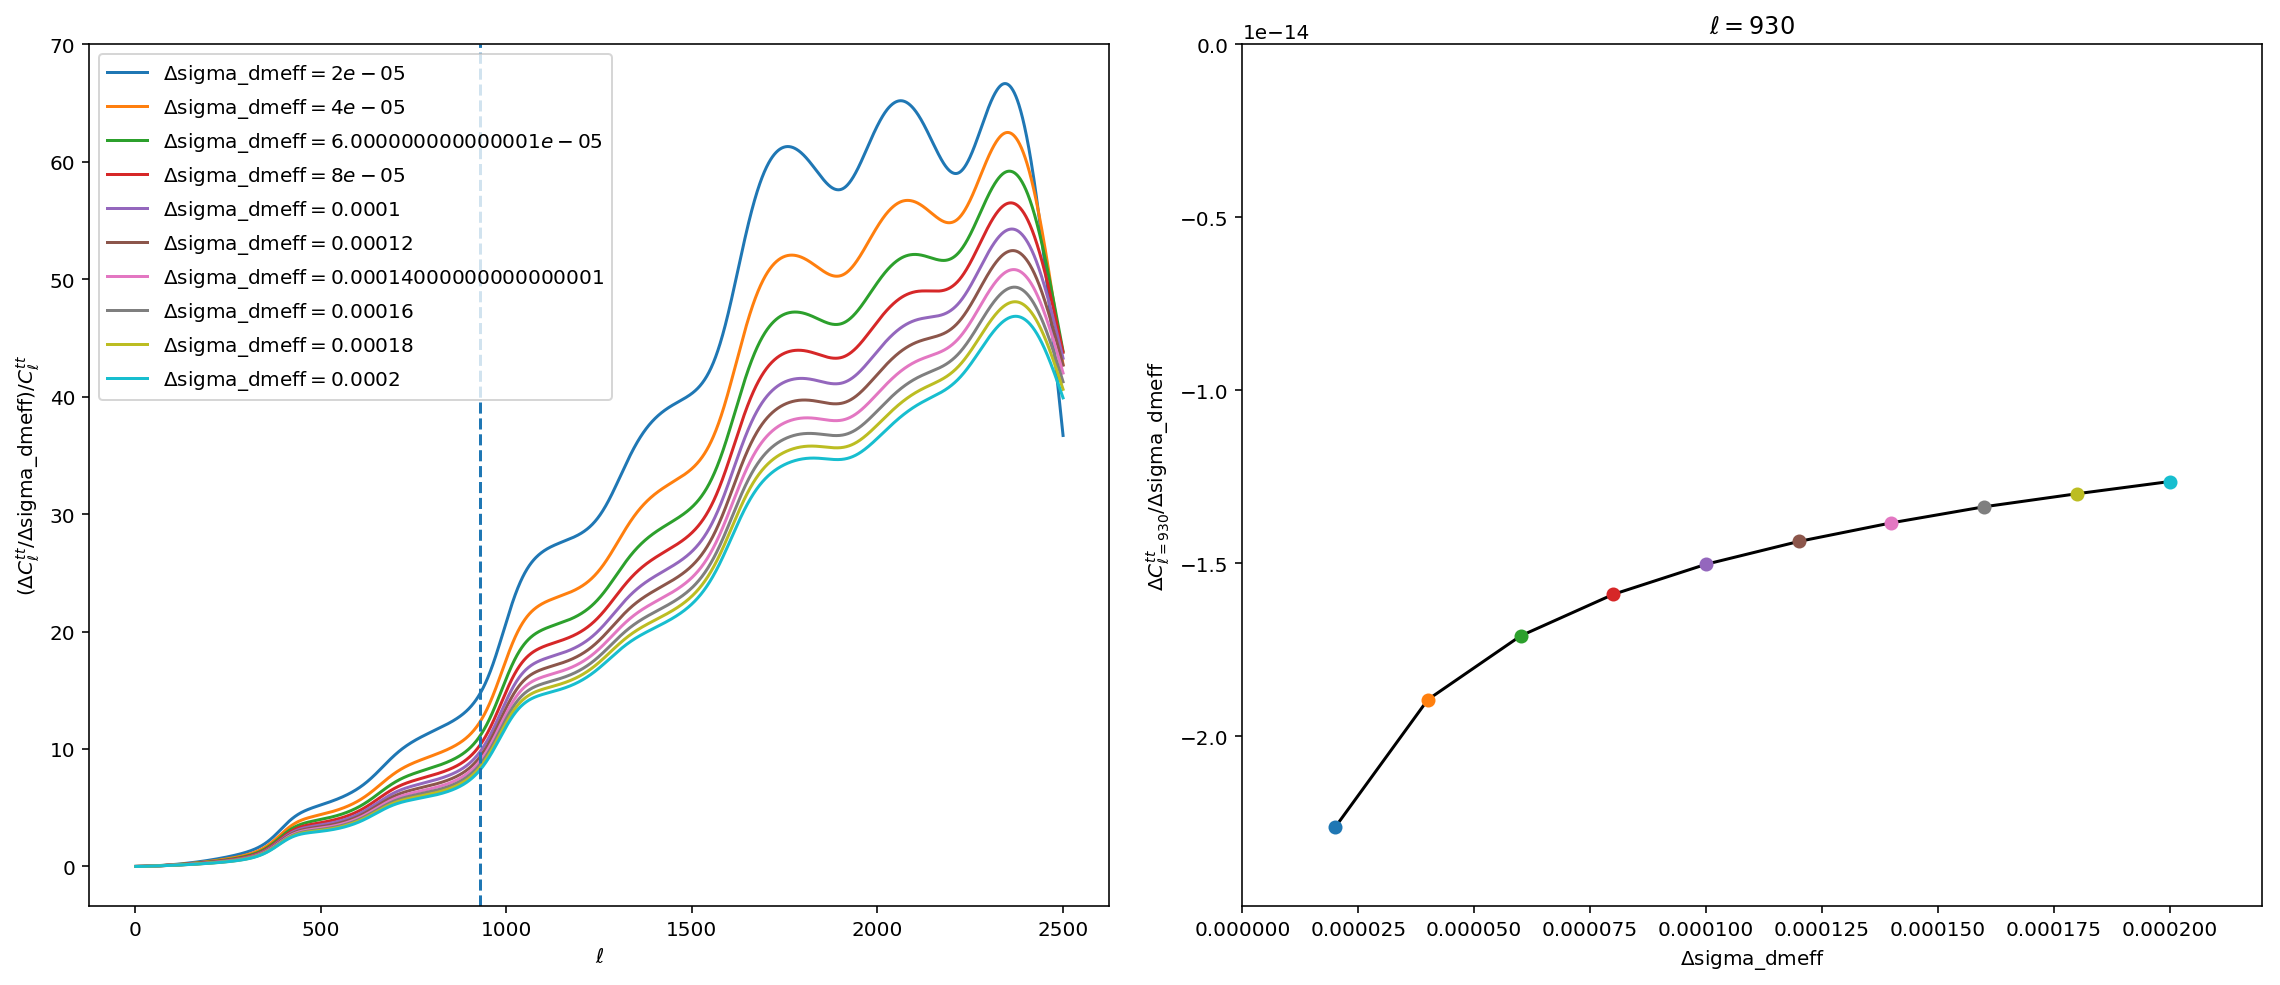

In [10]:
classy_template['m_dmeff'] = 1
classy_template['npow_dmeff'] = 6
# change the size 5.0e-04
obs.check_deriv_compute("sigma_dmeff", np.linspace(2e-05, 2e-04, 10), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

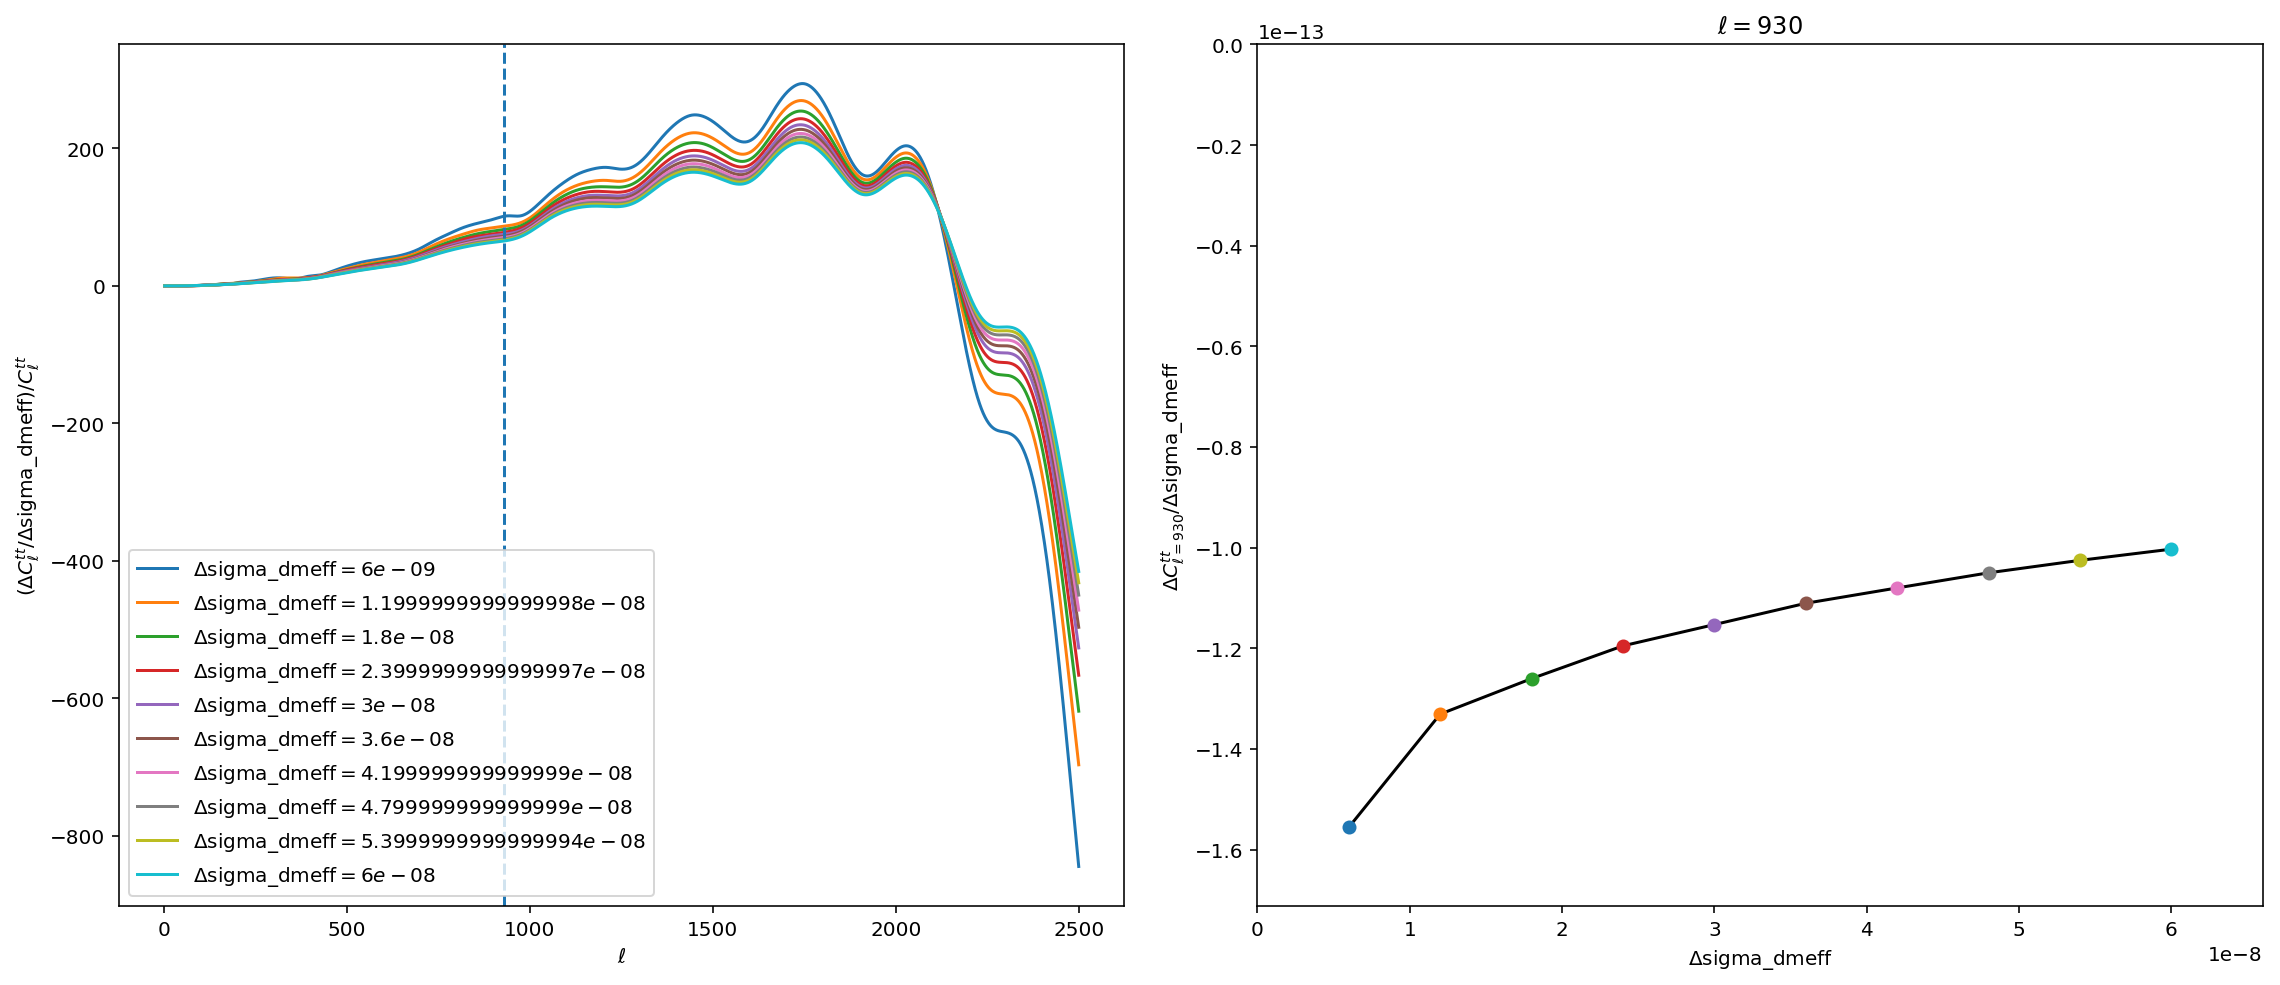

In [14]:
classy_template['m_dmeff'] = 1
classy_template['npow_dmeff'] = 6
# change the size 5.0e-04
obs.check_deriv_compute("sigma_dmeff", np.linspace(6e-09, 6e-08, 10), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

The interval with better convergence, although even there the derivative is not constant.

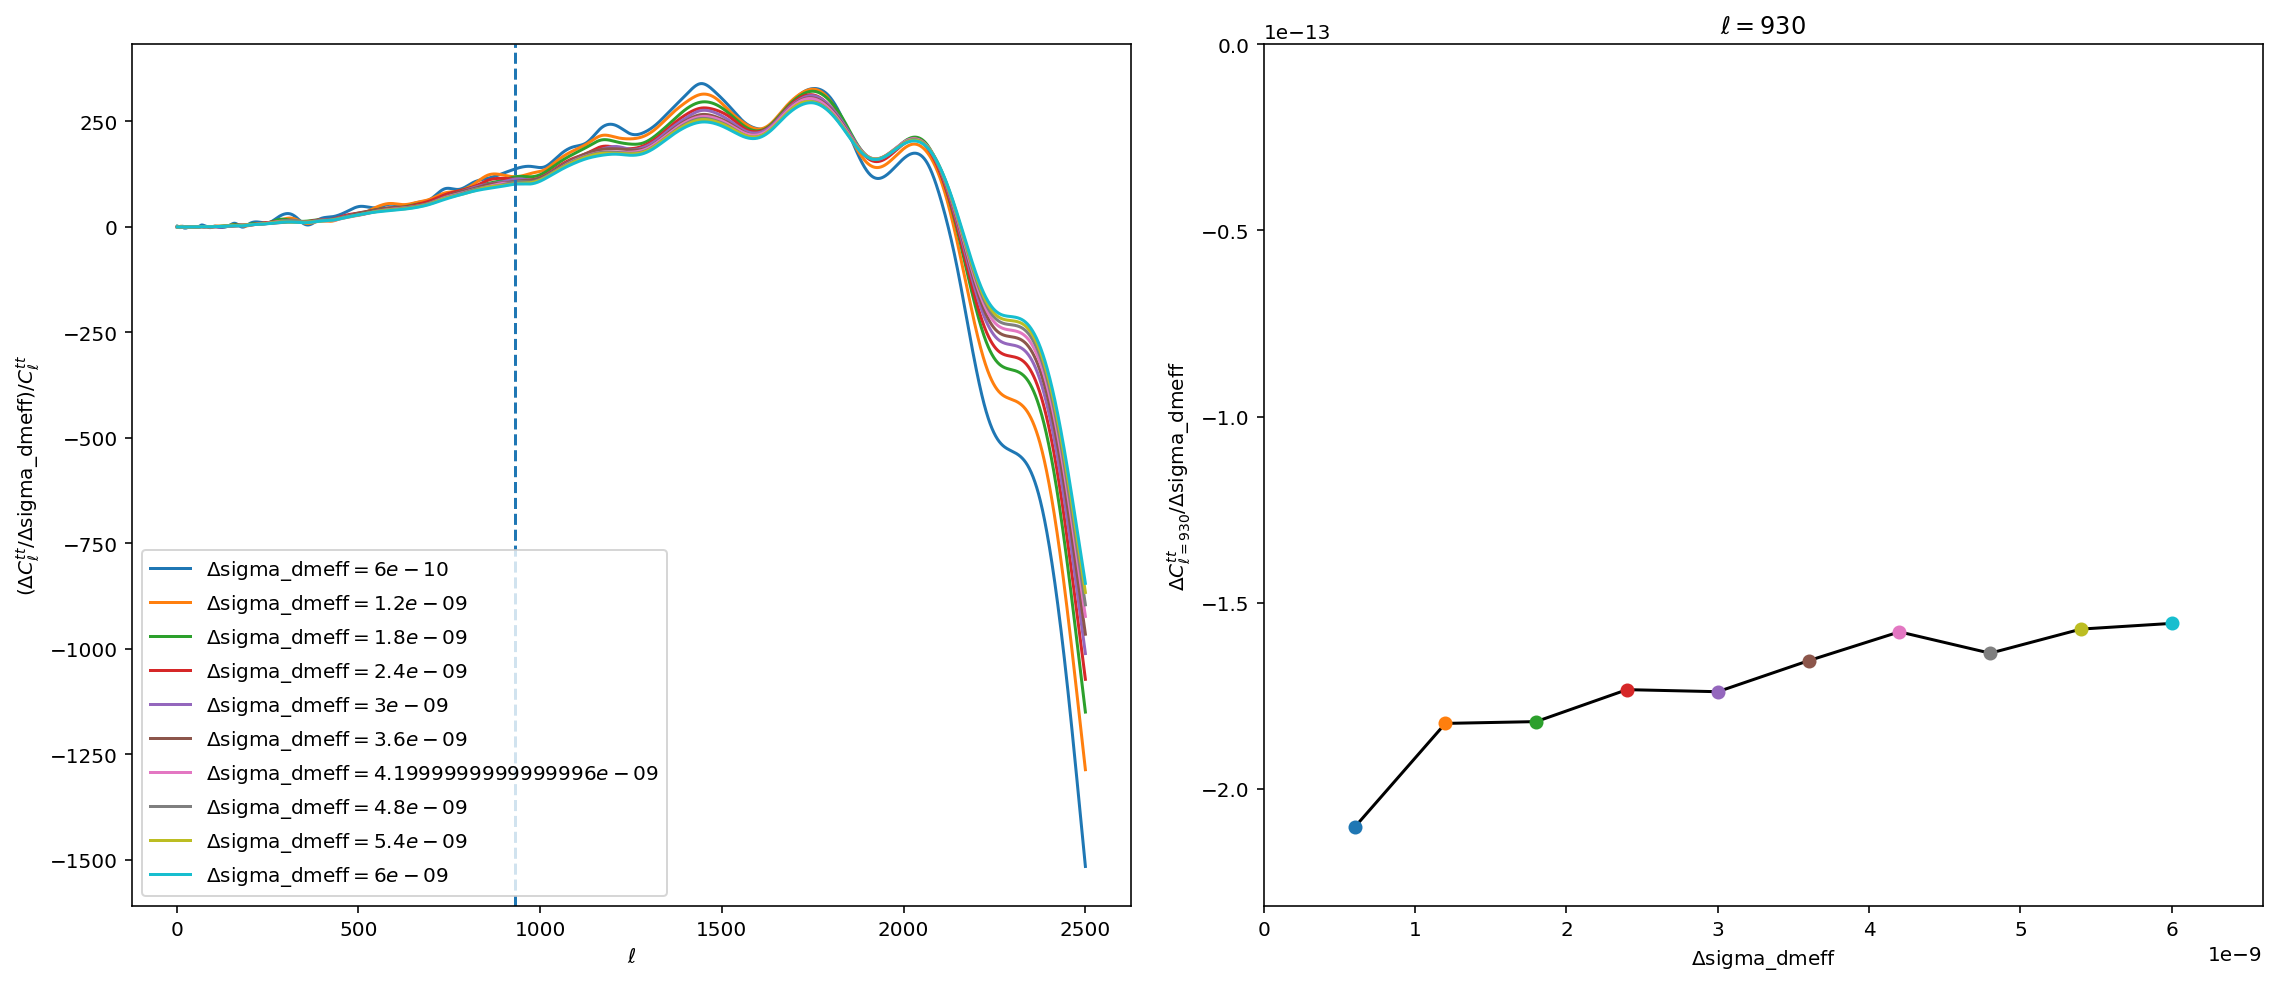

In [15]:

classy_template['m_dmeff'] = 1
classy_template['npow_dmeff'] = 6
# change the size 5.0e-04
obs.check_deriv_compute("sigma_dmeff", np.linspace(6e-10, 6e-09, 10), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

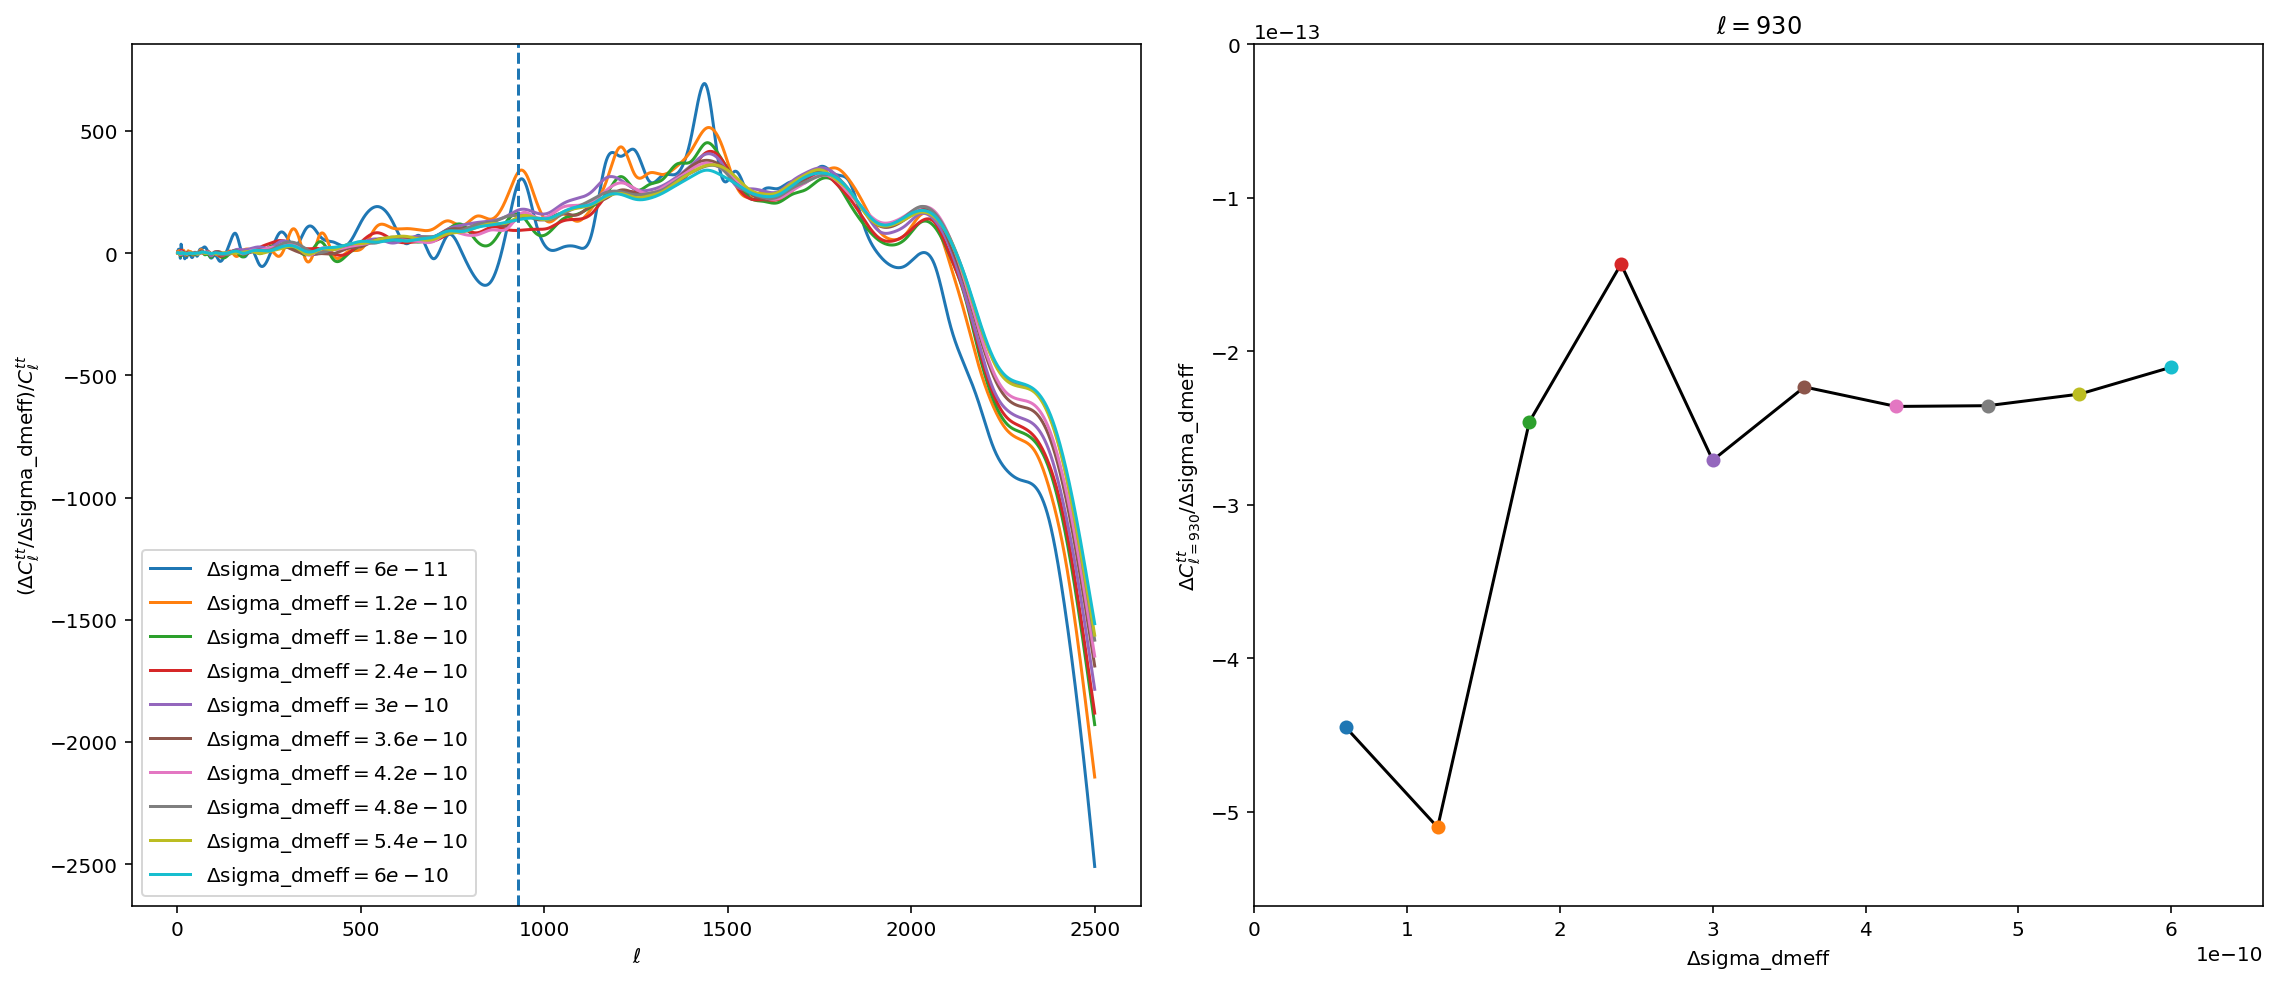

In [16]:
# if we go further down, the region starts to be dominated by numerical noise
classy_template['m_dmeff'] = 1
classy_template['npow_dmeff'] = 6
# change the size 5.0e-04
obs.check_deriv_compute("sigma_dmeff", np.linspace(6e-11, 6e-10, 10), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)